In [346]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.metrics import pairwise_distances
from scipy.stats import rankdata, spearmanr

num_points = 200  
radius = [1,2,3]       # Radii of the circles
gau_noise = 0.2  # Amount of random noise to add

In [347]:
# Generate angles evenly distributed along the circle
angles = np.linspace(0, 2 * np.pi, num_points)

In [348]:
x_all=[]
y_all=[]

In [349]:
# Generating points on the circle (x, y) for each radius.
for r in radius:
    x = r * np.cos(angles)
    y = r * np.sin(angles)
    x_noisy = x + np.random.normal(0, gau_noise, num_points) #adding random standard normal noise to x coordinates
    y_noisy = y + np.random.normal(0, gau_noise, num_points) #adding random standard normal noise to y coordinates
    x_all.append(x_noisy)
    y_all.append(y_noisy)

### Part A - Plotting the generated dataset

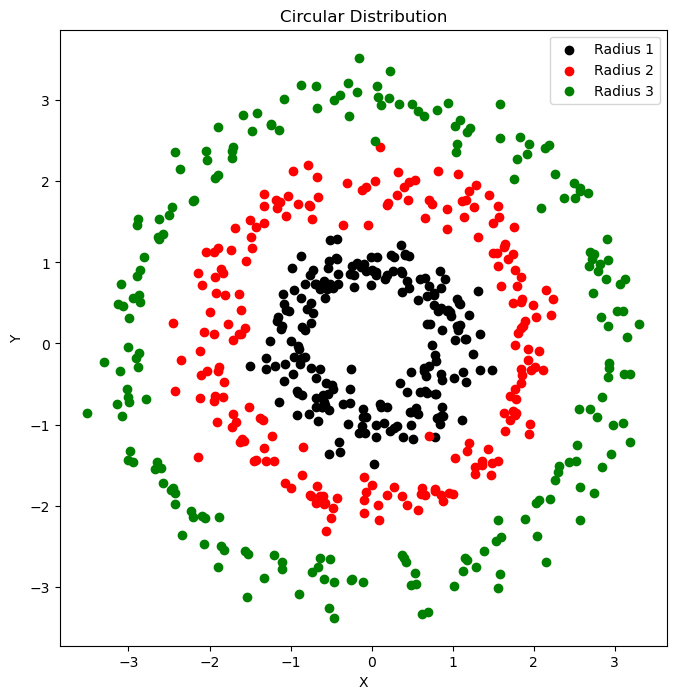

In [350]:
plt.figure(figsize=(8, 8))
plt.scatter(x_all[0], y_all[0], color='black', label='Radius 1')
plt.scatter(x_all[1], y_all[1], color='red', label='Radius 2')
plt.scatter(x_all[2], y_all[2], color='green', label='Radius 3')

plt.title('Circular Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

Data is already centered 

In [351]:
df =[]
i=0
tag=[]
# A loop to create a list of tags for which points belong to which color in the original space. k = black, r = red, g = green points
# And join x and y coordinates for each point in a list.
while i<3: 
    for (x_coord,y_coord) in zip(x_all[i], y_all[i]):
        if i+1==1:
            tag.append('k')
        elif i+1==2:
            tag.append('r')
        else:
            tag.append('g')
            
        df.append([x_coord, y_coord])
    i+=1



### Part B - Performing Kernel PCA on the dataset using degree 2 polynomial and Plotting the data points in the plane of first 2 Principal Components.

In [352]:
# fitting and transforming the data
kpca_obj = KernelPCA(kernel='poly', degree=2)
kpca_obj.fit(df)
transformed_df=kpca_obj.transform(df)

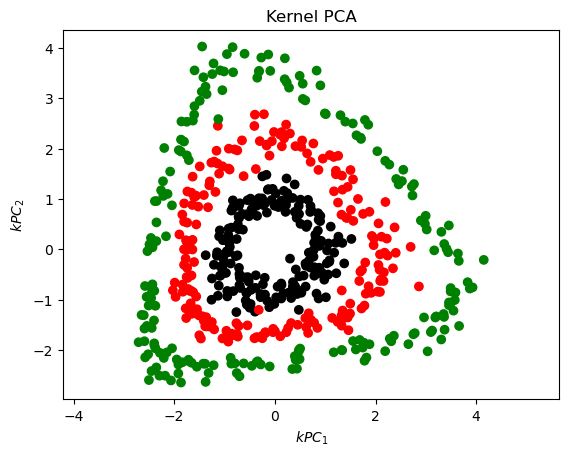

In [353]:
plt.figure(6)
plt.title("Kernel PCA")
plt.scatter(transformed_df[:, 0], transformed_df[:, 1], c=tag)
plt.axis('equal')
plt.xlabel("$kPC_1$")
plt.ylabel("$kPC_2$")
plt.show()

In [354]:
def pd_calculator(pairwise_list):
    #Pairwise distance calculator function
    pd=pairwise_distances(pairwise_list, metric='euclidean')
    return pd


In [355]:
flat_original_pd = pd_calculator(df) #pairwise distance matrix of points in the original space
flat_poly_pd = pd_calculator(transformed_df[:,[0,1]]) #PD matrix in the polynomial transformed space using only first and second KPCs

### Part C - Shepard diagram for the distance rank ordering for polynomial KPCA.

In [356]:
def shephard_diagram(original_distance, transformed_distance):
    # Calculates ranks for the original and transformed distances and plots them against each other
    orig_dist_rank = rankdata(original_distance.ravel())
    trans_dist_rank = rankdata(transformed_distance.ravel())
    plt.scatter(y=trans_dist_rank, x=orig_dist_rank, alpha=0.5, s=1)
    plt.plot([0, np.max(orig_dist_rank)], [0, np.max(orig_dist_rank)], 'r--')  # y = x line
    plt.title("Shepherd's Diagram for Poly Kernel PCA")
    plt.xlabel('Distances in Original Space')
    plt.ylabel('Distances in 2d KPC Space')
    plt.show()

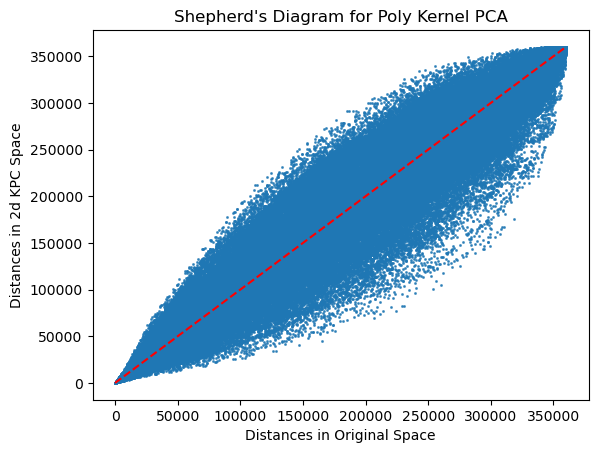

In [357]:
shephard_diagram(flat_original_pd, flat_poly_pd)

### Part D - Kernel PCA on the dataset using a Gaussian kernel with 4 different standard deviations

In [358]:
def cum_var_kpca(fitted_kernel):
    eigenvals = fitted_kernel.eigenvalues_

    # Calculate the explained variance ratio (normalized eigenvalues)
    explained_variance_ratio = eigenvals / np.sum(eigenvals)
    
    # Calculate the cumulative variance
    cumulative_variance = np.cumsum(explained_variance_ratio)
    return cumulative_variance

In [359]:
sigma = [0.1, 1, 3, 10] # Array of sigmas
transformed_df_gau=[] # empty list that will contain transformed data for each sigma.
fitted_kernels = []
for sig in sigma:
    gamma = 1/(2*sig**2)
    gau_kpca_obj= KernelPCA(kernel='rbf', gamma=gamma, n_components=None)
    gau_kpca_obj.fit(df)
    transformed_df_gau.append(gau_kpca_obj.transform(df))
    fitted_kernels.append(gau_kpca_obj)


In [360]:
def triple_plts(x_one=[], x_two=[], y_one=[], y_two=[], z_one=[], sigma=0.1):
    plt.figure(figsize=(20, 8))

    # First scatter plot
    plt.subplot(1, 3, 1)  # 3 rows, 1 column, 1st plot
    plt.scatter(x_one, x_two, c=tag)
    plt.title(f'Transformed Gaussian KPCA points (Sigma={sigma})')
    plt.xlabel('First KPC')
    plt.ylabel('Second KPC')

    # Second scatter plot
    plt.subplot(1,3, 2)  # 3 rows, 1 column, 2nd plot
    orig_dist_rank= rankdata(y_one.ravel())
    trans_dist_rank = rankdata(y_two.ravel())
    plt.scatter(orig_dist_rank, trans_dist_rank)
    plt.title(f"Shepard's Diagram. (Sigma={sigma})")
    plt.xlabel('Distance Rank in Original Space')
    plt.ylabel('Distance Rank in Transformed Space ')

    # Third scatter plot
    plt.subplot(1, 3,3)  # 3 rows, 1 column, 3rd plot
    plt.plot(range(1, len(z_one) + 1), z_one)
    plt.title(f'Cumulative Variance vs. Number of KPCA Components. (Sigma={sigma})')
    plt.xlabel('Number of KPCA Components')
    plt.ylabel('Cumulative Variance')
    plt.grid(True)

    # Adjust the layout for readability
    plt.tight_layout()

    # Display the scatter plots
    plt.show()

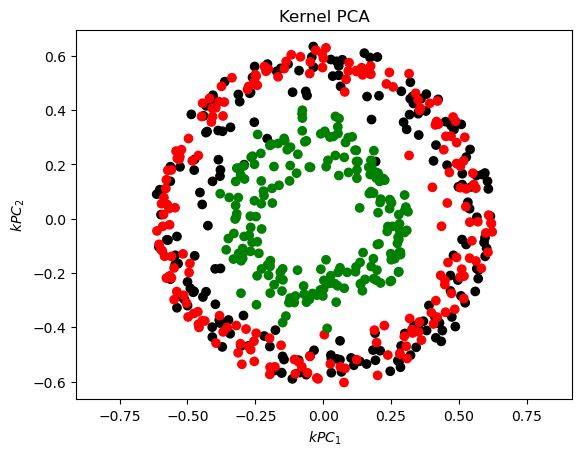

In [396]:
plt.figure(4)
plt.title("Kernel PCA")
plt.scatter(transformed_df_gau[1][:,0], transformed_df_gau[1][:,1], c=tag)
plt.axis('equal')
plt.xlabel("$kPC_1$")
plt.ylabel("$kPC_2$")
plt.show()

In [362]:
pd_sigma_one=pd_calculator(transformed_df_gau[0][:,[0,1]])
pd_sigma_two = pd_calculator(transformed_df_gau[1][:,[0,1]])
pd_sigma_three= pd_calculator(transformed_df_gau[2][:, [0,1]])
pd_sigma_four = pd_calculator(transformed_df_gau[3][:,[0,1]])

pd_list = [pd_sigma_one, pd_sigma_two, pd_sigma_three, pd_sigma_four]

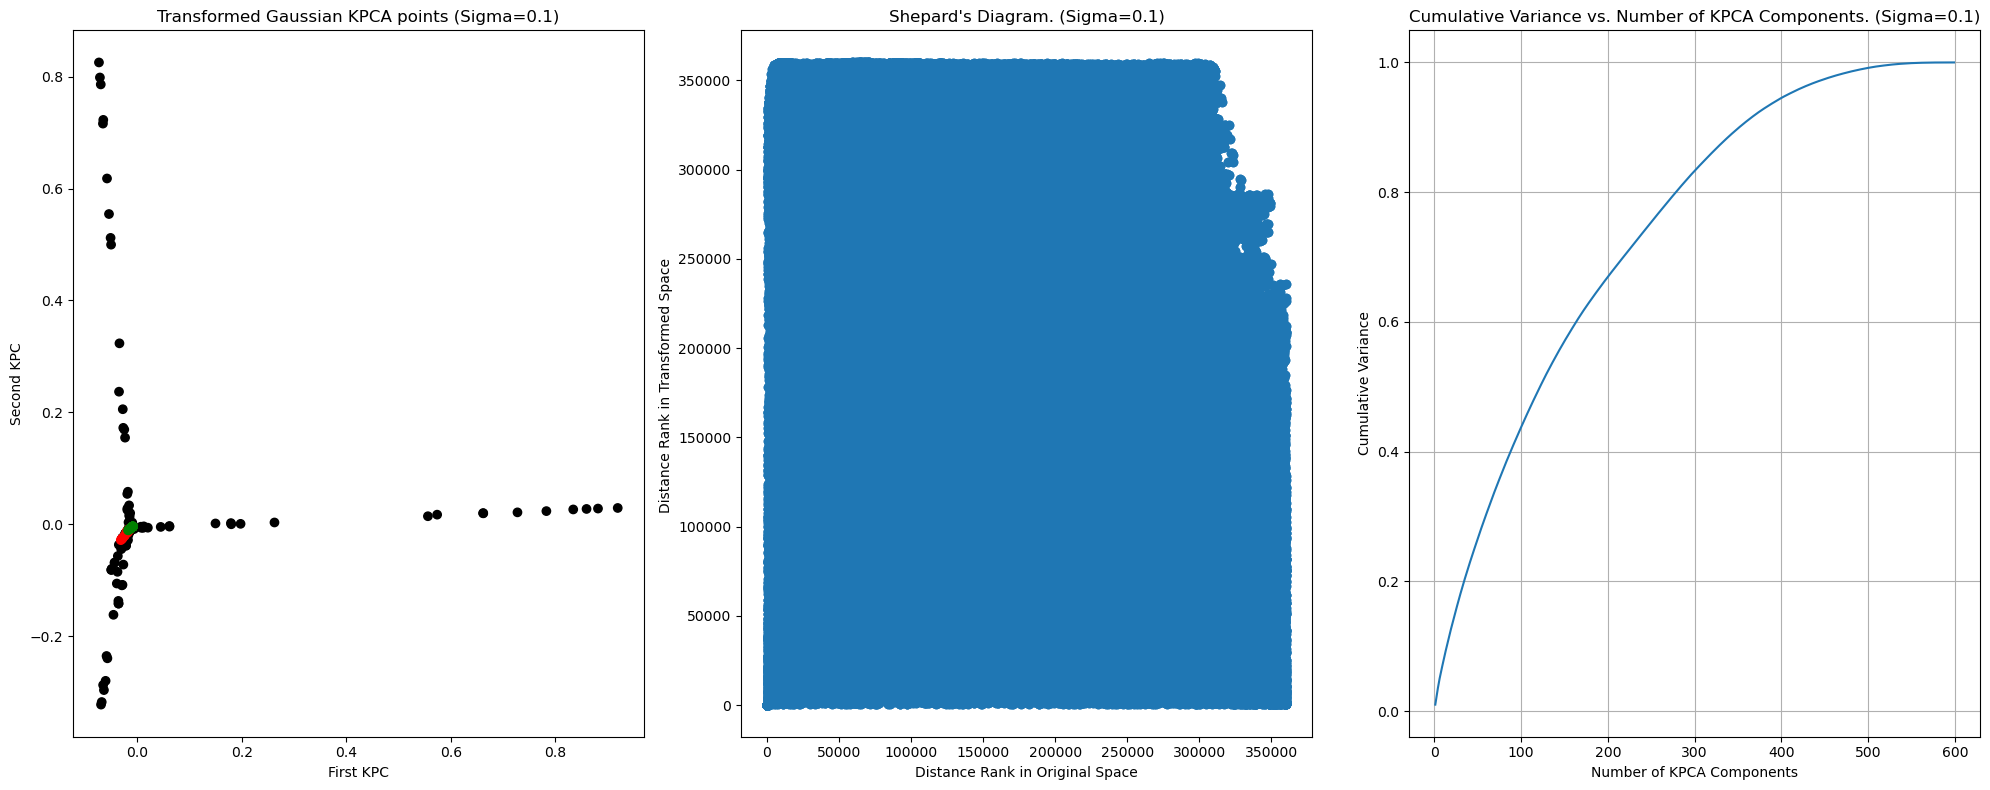

In [363]:
triple_plts(x_one=transformed_df_gau[0][:,[0]], x_two=transformed_df_gau[0][:,[1]], y_one=flat_original_pd, y_two=pd_sigma_one, z_one=cum_var_kpca(fitted_kernels[0]), sigma=0.1)

In [364]:
len(pd_sigma_one)


600

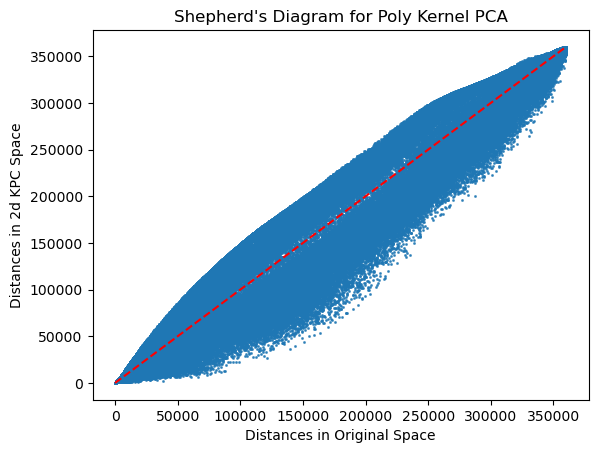

In [365]:
shephard_diagram(flat_original_pd, pd_sigma_three)

In [366]:
def dist_rank(flat_pd):
    list_dist_rank = rankdata(flat_pd.ravel())
    return list_dist_rank
    

In [367]:
spearman_rho_list = []
for r in pd_list:
    orig_dist_rank = dist_rank(flat_original_pd)
    trans_dist_rank= dist_rank(r)
    spearman_rho, p=spearmanr(a=orig_dist_rank, b=trans_dist_rank)
    spearman_rho_list.append(spearman_rho)


In [368]:
spearman_rho_list

[-0.23448668388372004,
 0.4921889155187516,
 0.9619687444986634,
 0.9995164866759171]

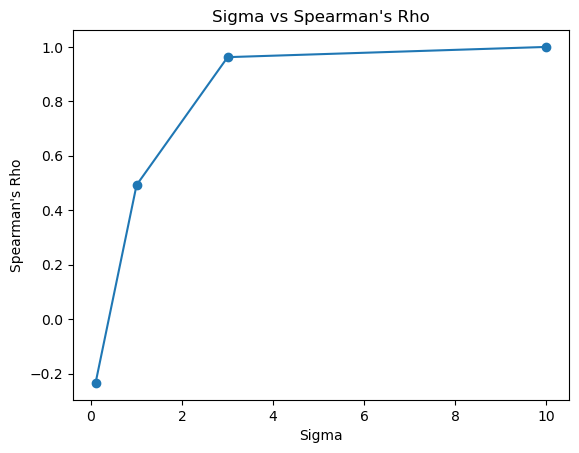

In [369]:

# Create a line plot
plt.plot(sigma, spearman_rho_list, marker='o')

# Add titles and labels
plt.title("Sigma vs Spearman's Rho")
plt.xlabel("Sigma")
plt.ylabel("Spearman's Rho")

# Display the plot
plt.show()